## Ex8: La promenade aléatoire démarre à présent sur le côté gauche du pont. Quelle est la probabilité que le promeneur tombe du côté droit? Et du côté gauche? Représenter les résultats graphiquement.


### 1) Paramètres de la simulation

Définition du pont et du point de départ sur le pont

In [21]:
Left_side = -3
Right_side = 3
Start = -3

Définition du nombre de pas maximum et du nombre de marcheurs

In [22]:
Steps = 100
Walkers = 10000

### 2) Packages et Initialisation

In [2]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Un data frame
    - col 1 : distance avant la chute
    - col 2 : marcheurs étant tombés
    - col 1 : coté de la chute


In [23]:
df_left = pd.DataFrame({'Side' : ['left' for steps in range(Steps+1)],
                        'NB_Steps' : [steps for steps in range(Steps+1)] , 
                        'Falling_Walkers' : [0 for walkers in range(Steps+1)]}, 
                       columns=[ 'Side','NB_Steps', 'Falling_Walkers'])
df_right = pd.DataFrame({'Side' : ['right' for steps in range(Steps+1)],
                        'NB_Steps' : [steps for steps in range(Steps+1)] , 
                        'Falling_Walkers' : [0 for walkers in range(Steps+1)]}, 
                       columns=[ 'Side','NB_Steps', 'Falling_Walkers'])
rwalk = pd.concat([df_left, df_right])

### 3) Définition des fonctions

##### La fonction de marche


In [4]:
def Walk():
    deplacement = random.choice([-1,1])
    return deplacement

##### La fonction de distance de marche avant la chute

Prends en argument :
    - Le nombre maximum de pas que le marcheur peut faire
    - L'extrémité gauche du pont
    - L'extrémité droite du pont
    - Le point de départ du marcheur
    
Retourne : 
    - un tupple : ( côté de la chute, distance avant la chute ) 
    

In [5]:
def Falling_distance(max_steps, left_start, right_start, start_position):
    
    position = start_position
    distance = 0
    
    for steps in range (max_steps):
        position += Walk()
        distance += 1
        if position > right_start :
            return ("right", distance)
            break
        if position < left_start :
            return ("left", distance)
            break
            
    if distance == max_steps : 
            return ("alive", distance)

### 4) Simulation

On lance plusieurs marcheurs en même temps et on incrémente le dataframe


In [24]:
for i in range (Walkers):
    FallingSide, FallingDistance  = Falling_distance(Steps, Left_side, Right_side, Start)
    if FallingSide == 'alive' : 
        pass
    else: 
        if FallingSide == 'left':
            rwalk.loc[(rwalk["Side"] == 'left') & (rwalk["NB_Steps"] == int(FallingDistance)), 'Falling_Walkers'] += 1
        else: 
            rwalk.loc[(rwalk["Side"] == 'right') & (rwalk["NB_Steps"] == int(FallingDistance)), 'Falling_Walkers'] += 1

On ajoute une colonne, contenant la probabilité, au dataframe


In [27]:
col = rwalk.apply ( lambda row : ((row['Falling_Walkers']) / Walkers)*100, axis = 1 ) 
rwalk["% Falling"] = col

### 5) Visualisation

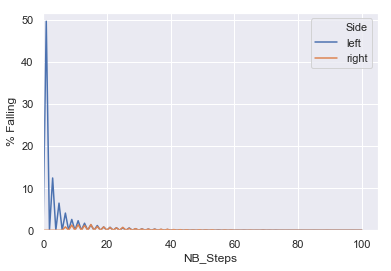

In [41]:
sns.set()
sns.lineplot(x = 'NB_Steps', y = '% Falling', hue = 'Side', data = rwalk)
plt.ylim(0, rwalk['% Falling'].max()+2)
plt.xlim(0, None)

plt.show()